In [91]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)
import time

In [96]:
N = 40
dx = 4/N
x = 0.6
y = 1.2

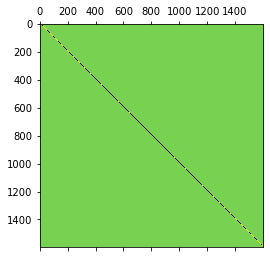

In [97]:
def matrix(N, dx):
    matrix = np.zeros((N**2,N**2))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= N:
            row[i-N] = 1
        if i < (N-1)*N:
            row[i+N] = 1
        if (i+1)%N !=1:
            row[i-1] = 1
        if (i+1)%N !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    dist_list = np.array([])
    for i in range(N):
        a = (i+0.5) * dx - 2
        for j in range(N):
            b = (j+0.5) * dx - 2
            dist = np.sqrt(a**2 + b**2)
            dist_list = np.append(dist_list, dist)
    change_list = dist_list > 2
    for i in range(len(change_list)):
        if change_list[i]:
            matrix[:, i] = 0
            matrix[i, :] = 0
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix

M = matrix(N, dx)
# print(m)
plt.matshow(M)
plt.show()

In [98]:
def init_b(N,dx,x,y):
    b = np.zeros((N, N))
    k = int(math.floor((2+x) /dx))
    l = int(math.floor((2-y) /dx))
    b[l,k] = -1
    b = np.reshape(b, (1, N*N))
    return b
b = init_b(N,dx,x,y)

# wanneer we onze sourch op 1 zetten worden de uiteindelijk 
#concentraties negatief, dat 

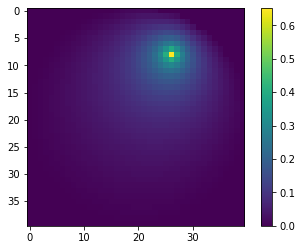

In [99]:
c = linalg.solve(M,b[0])
C = np.reshape(c, (N,N))
colormap = plt.imshow(C, cmap='viridis')
plt.colorbar()
plt.show()